source pour les ellipses:

- https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
- https://github.com/SJinping/Gaussian-ellipse

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

from sklearn.datasets import load_iris

In [2]:
def get_cloud(x: np.ndarray, barycenter, n_std: int, **kwargs):
    cov = np.cov(x, rowvar=False)

    values, vectors = np.linalg.eigh(cov)
    w, h = 2*n_std*np.sqrt(values)
    angle = np.degrees(np.arctan2(*vectors[:,0][::-1]))

    return Ellipse(xy=barycenter, width=w, height=h, angle=angle, **kwargs)

In [3]:
data = pd.concat(load_iris(return_X_y=True, as_frame=True), axis=1)
labels = dict(zip(range(3), load_iris().target_names))
data['target'] = data['target'].replace(labels)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


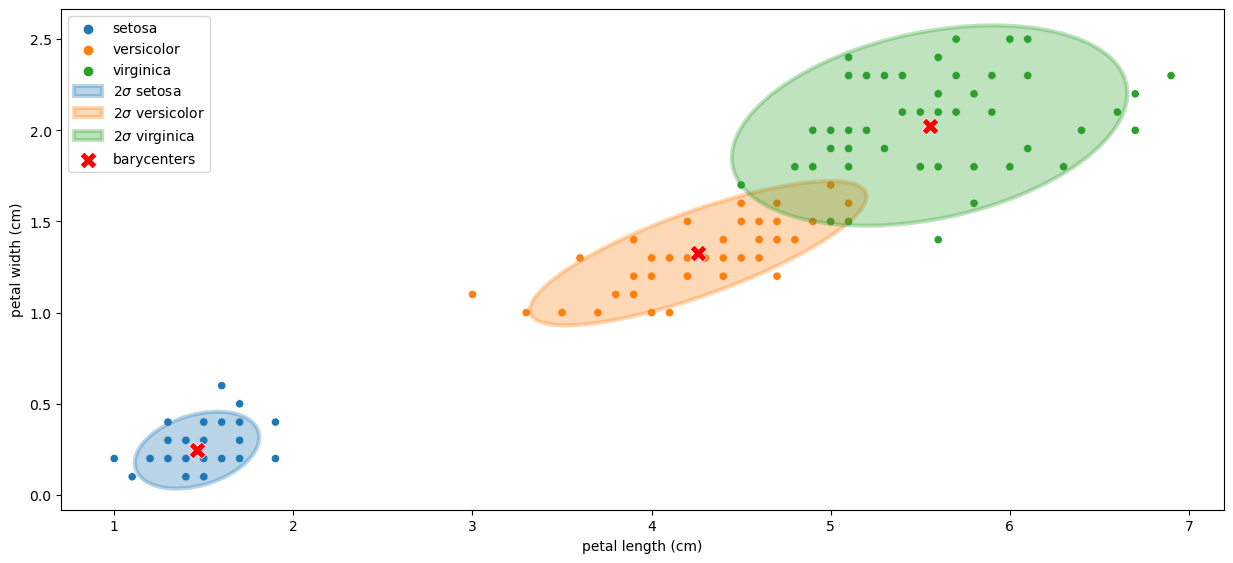

In [4]:
n_std = 2
cols = data.columns[2:4]
barycenter = data.groupby('target')[cols].mean()
colors = plt.rcParams.get('axes.prop_cycle').by_key()['color']

marker = MarkerStyle("X", transform=Affine2D().scale(2))

plt.figure(figsize=(15, 6.5))
ax = sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='target')
for center, label, c in zip(barycenter.itertuples(index=False), labels.values(), colors):
    kwargs = {
        'facecolor': c,
        'alpha': .3,
        'edgecolor': c,
        'linewidth': 3,
        'label': f'{n_std}$\sigma$ {label}'
    }
    ax.add_patch(get_cloud(data.loc[data['target'] == label, cols], center, n_std, **kwargs))
ax = sns.scatterplot(data=barycenter, x='petal length (cm)', y='petal width (cm)', c='red', marker=marker, label='barycenters')
plt.legend()
plt.show()

In [5]:
np.cov(data.iloc[:, 0], rowvar=False)

array(0.68569351)